# Lecture 3 --- Just War!

(Summer 2022)

## Outline of topics for this segment:

1. HW: Program up the game of war


In [1]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# War!

<a href="https://bicyclecards.com/how-to-play/war/" target="_blank">The War Card Game</a>.

Need a data structure to hold the state of a players cards ... 

Could number the cards from top to bottom (13 = A, 12 = K, 11 = Q, 10 = J, 9 = 10, 8 = 9, 7 = 8, 6 = 7, 5 = 6, 4 = 5, 3 = 4, 2 = 3, 1 = 2 ...

There are four suites meaning each of the numbers above is repeated 4 times. All are equivalent.

Need a routine to shuffle a list ...

### Following are some code snippets I've explored for trying to build a war game .... It's not finished, by the way.

In [42]:
fulldeck = np.array([13, 13, 13, 13, 12, 12, 12, 12, 11, 11, 11, 11, 10, 10, 10, 10, 9, 9, 9, 9, 8, 8, 8, 8, 7, 7, 7, 7,
           6, 6, 6, 6, 5, 5, 5, 5, 4, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1])

In [43]:
fulldeck

array([13, 13, 13, 13, 12, 12, 12, 12, 11, 11, 11, 11, 10, 10, 10, 10,  9,
        9,  9,  9,  8,  8,  8,  8,  7,  7,  7,  7,  6,  6,  6,  6,  5,  5,
        5,  5,  4,  4,  4,  4,  3,  3,  3,  3,  2,  2,  2,  2,  1,  1,  1,
        1])

In [44]:
np.random.shuffle(fulldeck)
print(fulldeck)

[ 2  8  2 11 11  7  1  1  3 13  5  5  6  4 12  1  6  9  5  4 12 10  8 13
  6 11  9  9  3  7  9  7  8 13  4 12 13  1  2  7  5  3 11  4  2 12 10  8
 10  6  3 10]


In [45]:
player1 = fulldeck[0:52:2]
player2 = fulldeck[1:52:2]

In [46]:
print(len(player1))
print(player1)
print(len(player2))
print(player2)

26
[ 2  2 11  1  3  5  6 12  6  5 12  8  6  9  3  9  8  4 13  2  5 11  2 10
 10  3]
26
[ 8 11  7  1 13  5  4  1  9  4 10 13 11  9  7  7 13 12  1  7  3  4 12  8
  6 10]


In [47]:
# A function to decide how deep the "wars" will go. It returns
# "-1" if there are not enough cards left in either player's hand
# to resolve the wardepth

def war(wardepth, player1, player2):
    if 4*wardepth < np.minimum(len(player1),len(player2)):
        if player1[4*wardepth] == player2[4*wardepth]:
            wardepth += wardepth
            wardepth = war(wardepth, player1, player2)
    else:
        wardepth = -1
    return wardepth

In [153]:
# Just some code I was using to play around ...

wardepth = 0;
if player1[0] > player2[0]:
    player1 = np.roll(player1,-1)
    player1 = np.append(player1, player2[0])
    player2 = np.delete(player2, 0)
elif player1[0] < player2[0]:
    player2 = np.roll(player2,-1)
    player2 = np.append(player2, player1[0])
    player1 = np.delete(player1, 0)
else:
    wardepth = 1
    wardepth = war(wardepth, player1, player2)
    if wardepth == -1:
        if len(player1) < len(player2):
            player2 = np.append(player2, player1)
            player1 = np.asarray([])
        elif len(player1) > len(player2):
            player1 = np.append(player1, player2)
            player2 = np.asarray([])
        else:
            player1 = np.roll(player1,-1)
            player2 = np.roll(player2,-1)
    else:
        if player1[wardepth] > player2[wardepth]:
            player1 = np.roll(player1,-(4*wardepth+1))
            player1 = np.append(player1, player2[0:(4*wardepth+1)])
            player2 = np.delete(player2, range(4*wardepth+1))
        else:
            player2 = np.roll(player2,-(4*wardepth+1))
            player2 = np.append(player2, player1[0:(4*wardepth+1)])
            player1 = np.delete(player1, range(4*wardepth+1))            
    

In [154]:
print(len(player1))
print(player1)
print(len(player2))
print(player2)

17
[ 7 13 12  5  3 11 10  3 11  5 13 10  4  1  5  7  4]
35
[ 6 11  8  7  2  9  4  7  2 13  1  9  5  9  1  8  3  4  1 12 10 12  3  8
  2  6 13  8 11  6  6  2 10  9 12]


In [162]:
# Basic function to "make a single move"

def War_make_a_move(player1, player2):
    if player1[0] > player2[0]:
        player1 = np.roll(player1,-1)
        player1 = np.append(player1, player2[0])
        player2 = np.delete(player2, 0)
    elif player1[0] < player2[0]:
        player2 = np.roll(player2,-1)
        player2 = np.append(player2, player1[0])
        player1 = np.delete(player1, 0)
    else:
        wardepth = 1
        wardepth = war(wardepth, player1, player2)
        if wardepth == -1:
            if len(player1) < len(player2):
                player2 = np.append(player2, player1)
                player1 = np.asarray([])
            elif len(player1) > len(player2):
                player1 = np.append(player1, player2)
                player2 = np.asarray([])
            else:
                player1 = np.roll(player1,-1)
                player2 = np.roll(player2,-1)
        else:
            if player1[wardepth] > player2[wardepth]:
                player1 = np.roll(player1,-(4*wardepth+1))
                player1 = np.append(player1, player2[0:(4*wardepth+1)])
                player2 = np.delete(player2, range(4*wardepth+1))
            else:
                player2 = np.roll(player2,-(4*wardepth+1))
                player2 = np.append(player2, player1[0:(4*wardepth+1)])
                player1 = np.delete(player1, range(4*wardepth+1))
                
    return player1, player2

Player2 wins


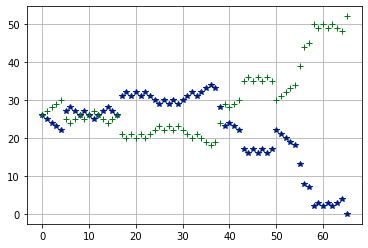

In [197]:
# A code to play a commplete game ...

fulldeck = np.array([13, 13, 13, 13, 12, 12, 12, 12, 11, 11, 11, 11, 10, 10, 10, 10, 9, 9, 9, 9, 8, 8, 8, 8, 7, 7, 7, 7,
           6, 6, 6, 6, 5, 5, 5, 5, 4, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1])
np.random.shuffle(fulldeck)
player1 = fulldeck[0:52:2]
player2 = fulldeck[1:52:2]

l1 = 26
l2 = 26
L1 = np.array([l1])
L2 = np.array([l2])

while l1 > 0 and l2 > 0:
    player1, player2 = War_make_a_move(player1, player2)
    l1 = len(player1)
    l2 = len(player2)
    L1 = np.append(L1,l1)
    L2 = np.append(L2,l2)
    
if l1 == 0:
    print('Player2 wins')
else:
    print('Player1 wins')

fig3 = plt.figure()
plt.style.use('seaborn-dark-palette')
plt.plot(L1,'*')
plt.plot(L2,'+')
plt.grid()



### There's plenty of work remaining to figure out the game:

* How to handle ties that make wars?
* What to do as one player's card list gets short? Maybe they won't have enough cards to complete the war.
* How to build the code to run many games to look at statistics for winning and losing?
* How to answer a question such as: Given I'm down to only 10 cards, what are my odds of coming back and winning?